In [1]:
from cftime import DatetimeNoLeap
from mpl_toolkits.basemap import interp
from os import chdir
from xarray import open_dataset

In [2]:
dt = 2015, 1, 1, 0
data_time = DatetimeNoLeap(dt[0], dt[1], dt[2], dt[3])
file_time = str(data_time).replace(' ', '_')

In [3]:
chdir('/home/zhangc/scenariomip_cmip6/nc_data/')

In [4]:
nc_6hr = ['ta_6hrLev_CESM2_ssp245_r2i1p1f1_gn_201501010000-202412311800.nc']

In [5]:
nc_day = ['tos_Oday_CESM2_ssp245_r2i1p1f1_gn_20150102-20650101.nc',
          'siconc_SIday_CESM2_ssp245_r2i1p1f1_gn_20150102-20650101.nc']

/home/zhangc/miniconda3/envs/python3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


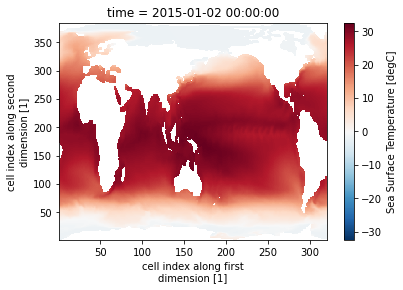

In [6]:
ds = open_dataset(nc_day[0])
da = ds.tos.isel(time=0)
da.plot()

In [15]:
from numpy import empty, repeat, stack
from scipy.interpolate import griddata
from xarray import DataArray

In [8]:
v = da.values.flatten()
x = da.lon.values.flatten()
y = da.lat.values.flatten()

In [13]:
xy = stack((x, y), axis=-1)

In [10]:
ds = open_dataset(nc_6hr[0])

/home/zhangc/miniconda3/envs/python3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'ta' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [11]:
lon1d = ds.lon.values
lat1d = ds.lat.values

In [12]:
lon2d = repeat(lon1d, len(lat1d)).reshape(len(lon1d), len(lat1d)).transpose()
lat2d = repeat(lat1d, len(lon1d)).reshape(len(lat1d), len(lon1d))

In [14]:
vi = griddata(xy, v, (lon2d, lat2d), method='linear')

In [19]:
da = DataArray(data=vi, coords=[lat1d, lon1d], dims=['lat', 'lon'])

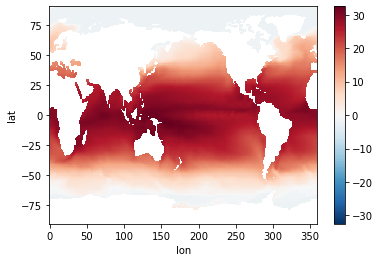

In [21]:
da.plot()